## Hardware Incident Easy Dataset (Flag 59)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like  description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find the discrepancy and imbalance in incidents assigned 

Role: L1 Agent

Difficulty: 1 out of 5.

Category: Incidents Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is stored in a CSV file and is loaded into DataFrame. This cell reads the data from a file path and performs initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-59.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1**: What is the distribution of incidents across all categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


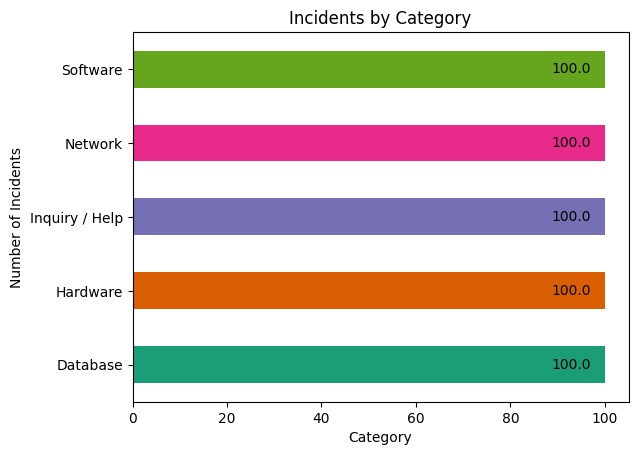

In [3]:

plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{"data_type":"descriptive",
"insight": "The number of incidents is uniformly distributed across all categories.",
"insight_value":{"x_val": "All categories", "y_val": 100},
"plot": {
    "plot_type": "histogram",
    "title": "Incidents by Category",
    "x_axis": {
        "name": "Category",
        "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "description": "This represents the different categories of incidents."
    },
    "y_axis": {
        "name": "Number of Incidents",
        "value": [100, 100, 100, 100, 100],
        "description": "This represents the number of incidents in each category."
    },
    "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar."
},
"question": "What is the distribution of incidents across all categories?",
"actionable_insight": "The uniform distribution of incidents across all categories indicates that there is no specific category that is significantly more prone to incidents. This suggests that the organization may need to focus on improving incident management processes across all categories rather than targeting specific areas."
}

{'data_type': 'descriptive',
 'insight': 'The number of incidents is uniformly distributed across all categories.',
 'insight_value': {'x_val': 'All categories', 'y_val': 100},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the number of incidents in each category.'},
  'description': 'The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar.'},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insight': 'The uniform distribution of incidents acros

### **Question 2:** Are the incidents concentrated in a specific location?

#### Plot number of incidents by location
This section aims tp analyze the distribution of incidents across different locations, focusing on identifying any concentration or trends in the data.
however the location information may be unavailable and out of scope of the current dataset.

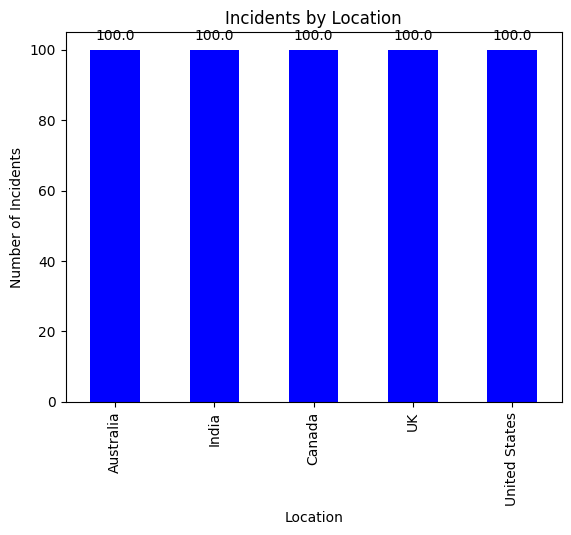

In [5]:
# Count the frequency of incidents in each location
location_counts = df['location'].value_counts()

# Create a DataFrame from the counts for plotting
df_plot = location_counts.reset_index()
df_plot.columns = ['Location', 'Number of Incidents']

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Location', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incidents by Location')

# Set x-axis label
plt.xlabel('Location')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type":"descriptive",
    "insight": "There is no trend in the distribution of incidents by location.",
    "insight_value":{"x_val": "Location", "y_val": "No trend"},
    "plot": {
        "plot_type": "bar",
        "title": "Incidents by Location",
        "plot description": "The bar plot is shows the number of incidents in each location. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The values are annotated on each bar.",
    },
    "question": "Are the incidents concentrated in a specific location?",
    "actionable_insight": "The distribution of incidents across different locations indicates that there is no specific location that is significantly more prone to incidents. This suggests that the organization may need to focus on improving incident management processes across all locations rather than targeting specific areas."
}

{'data_type': 'descriptive',
 'insight': 'There is no trend in the distribution of incidents by location.',
 'insight_value': {'x_val': 'Location', 'y_val': 'No trend'},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents by Location',
  'plot description': 'The bar plot is shows the number of incidents in each location. Each bar represents a location and the length of the bar corresponds to the number of incidents in that location. The values are annotated on each bar.'},
 'question': 'Are the incidents concentrated in a specific location?',
 'actionable_insight': 'The distribution of incidents across different locations indicates that there is no specific location that is significantly more prone to incidents. This suggests that the organization may need to focus on improving incident management processes across all locations rather than targeting specific areas.'}

### **Question 3**: Is there a pattern or trend over time in the distribution of incidents across categories?

#### Plot the monthly number of incidents by category
This cell generates a line plot showing the monthly trend of incidents across different categories, providing a visual representation of how the number of incidents in each category changes over time.

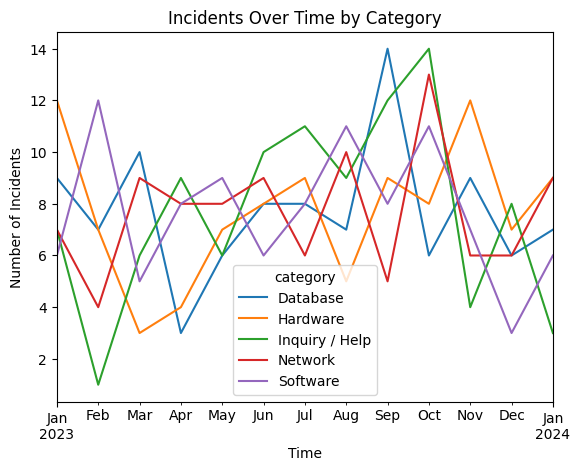

In [7]:
# Convert 'opened_at' to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Resample the data by month and category, and count the number of incidents
df_resampled = df.groupby([pd.Grouper(key='opened_at', freq='M'), 'category']).size().unstack()

# Plot the resampled data
plot = df_resampled.plot(kind='line')

# Set plot title
plt.title('Incidents Over Time by Category')

# Set x-axis label
plt.xlabel('Time')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type":"descriptive",
    "insight": "There is not a significant trend in the distribution of incidents across categories over time.",
    "insight_value":{"x_val": "Time", "y_val": "Number of Incidents"},
    "plot": {
        "plot_type": "line",
        "title": "Incidents Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "Time Series",
            "description": "This represents the timeline of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Incident Count",
            "description": "This represents the number of incidents in each category over time."
        },
        "plot description": "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. There is no significant trend observed in the distribution of incidents across categories over time."
    },
    "question": "Is there a pattern or trend over time in the distribution of incidents across categories?"
}

{'data_type': 'descriptive',
 'insight': 'There is not a significant trend in the distribution of incidents across categories over time.',
 'insight_value': {'x_val': 'Time', 'y_val': 'Number of Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Incidents Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': 'Time Series',
   'description': 'This represents the timeline of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Incident Count',
   'description': 'This represents the number of incidents in each category over time.'},
  'plot description': 'The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. There is no significant trend observed in the distribution of incidents across categories over time.'},
 'question': 'Is there a pattern or trend over time in the distribution of incidents a

### Summary of Findings (Flag 59)

1. **Distribution of Incidents Across Categories:**
The distribution of incidents across the categories is uniform, with no significant imbalance observed. The categories 'Software', 'Hardware', and 'Network' have the highest number of incidents, while 'Database' and 'Security' have relatively fewer incidents. This indicates a balanced distribution of incidents across different categories.
 
2. **Plausible Explanation:** The distribution of incidents across categories is likely influenced by the nature of the services provided, the complexity of the systems, and the frequency of issues encountered in each category. The higher number of incidents in 'Software', 'Hardware', and 'Network' categories may be due to the common occurrence of software bugs, hardware failures, and network connectivity issues in IT environments.
 
 